In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import spacy
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
recipe_df = pd.read_json("C:/Users/16613/OneDrive/Desktop/Bana 275 NLP/recipes_raw/recipes_raw_nosource_ar.json", orient="index")

In [3]:
#function to turn lists into strings
def list_to_string(list):
    return ', '.join(list)

#apply function to ingredients column
recipe_df['ingredients'] = recipe_df['ingredients'].apply(list_to_string)


In [4]:
# combine the title, ingredients, and instructions into one string
recipe_df['all_text'] = recipe_df['title'] + ' ' + recipe_df['ingredients'] + ' ' + recipe_df['instructions']

In [5]:
recipe_df.insert(1, "id", list(range(1, len(recipe_df)+ 1)), True)

In [6]:
recipe_df.head()

,title,id,ingredients,instructions,picture_link,all_text
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,1,"4 skinless, boneless chicken breast halves ADV...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S,"Slow Cooker Chicken and Dumplings 4 skinless, ..."
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,2,2 (10.75 ounce) cans condensed cream of mushro...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,Awesome Slow Cooker Pot Roast 2 (10.75 ounce) ...
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,3,"1/2 cup packed brown sugar ADVERTISEMENT, 1/2 ...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,Brown Sugar Meatloaf 1/2 cup packed brown suga...
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,4,"1 cup butter, softened ADVERTISEMENT, 1 cup wh...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,"Best Chocolate Chip Cookies 1 cup butter, soft..."
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,5,8 ounces whole wheat rotini pasta ADVERTISEMEN...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm,Homemade Mac and Cheese Casserole 8 ounces who...


In [7]:
recipe_new = recipe_df[['id', 'title', 'all_text']]
recipe_new.head(1)

,id,title,all_text
rmK12Uau.ntP510KeImX506H6Mr6jTu,1,Slow Cooker Chicken and Dumplings,"Slow Cooker Chicken and Dumplings 4 skinless, ..."


In [8]:
recipe_new.set_index(pd.Series(range(0, len(recipe_new))), inplace=True)
recipe_new.head(1)

,id,title,all_text
0,1,Slow Cooker Chicken and Dumplings,"Slow Cooker Chicken and Dumplings 4 skinless, ..."


In [9]:
#nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('advertisement')
stop.append('want')

In [10]:
def text_preprocessing(column):
    #make all words with lower letters
    column = column.str.lower()
    #getting rid of any punctution
    column = column.str.replace("[^\w\s]", '', regex=True)
    # Getting rid of numbers
    column = column.str.replace('\d+', '', regex=True)
    #spliting each sentence to words to apply previous funtions on them 
    word_tokens = column.str.split()
    keywords = word_tokens.apply(lambda x: [item for item in x if item not in stop])
    #assemble words of each sentence again and assign them in new column
    for i in range(len(keywords)):
        keywords[i] = " ".join(keywords[i])
        column = keywords

    return column

In [11]:
recipe_new['cleaned_text'] = text_preprocessing(recipe_new['all_text'])
recipe_new['cleaned_text'][4]

C:\Users\16613\AppData\Local\Temp\ipykernel_24036\3195812746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_new['cleaned_text'] = text_preprocessing(recipe_new['all_text'])


'homemade mac cheese casserole ounces whole wheat rotini pasta cups fresh broccoli florets medium onion chopped cloves garlic minced tablespoons butter divided tablespoons allpurpose flour teaspoon salt teaspoon ground black pepper cups milk ounces cheddar cheese shredded ounces reducedfat cream cheese cubed softened cup fine dry italianseasoned bread crumbs reynolds wrap non stick aluminum foil preheat oven degrees f line quart casserole dish reynolds wrapr pan lining paper parchment side need grease dish cook pasta large saucepan according package directions adding broccoli last minutes cooking drain return saucepan set aside cook onion garlic tablespoons hot butter large skillet minutes tender stir flour salt black pepper add milk cook stir medium heat slightly thickened bubbly add cheddar cheese cream cheese stirring melted pour cheese sauce pasta broccoli stir well combined melt remaining tablespoons butter mix bread crumbs small bowl transfer pasta mixture prepared casserole dish

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_matrix = CV.fit_transform(recipe_new['cleaned_text'])

In [20]:
pd.set_option('display.max_colwidth', None)
test = input("Please type ingredients you want recipes for")
test = CV.transform([test])
cosine_sim = cosine_similarity(test, converted_matrix).flatten()
recipe_new['cosine_sim'] = cosine_sim
recipe_new.sort_values(by='cosine_sim', ascending=False)[['id', 'title', 'cleaned_text', 'cosine_sim']].head(10)
#recipe_new.sort_values(by='cosine_sim', ascending=False).head(10)

C:\Users\16613\AppData\Local\Temp\ipykernel_24036\3381453462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_new['cosine_sim'] = cosine_sim


,id,title,cleaned_text,cosine_sim
22153,22154,Balsamic Marinated Flank Steak,balsamic marinated flank steak pound beef flank steak salt black pepper balsamic marinade cup balsamic vinegar tablespoons olive oil tablespoon chopped fresh basil teaspoons dijonstyle mustard clove garlic minced teaspoon sugar combine marinade ingredients small bowl place beef steak marinade foodsafe plastic bag turn steak coat close bag securely marinate refrigerator hours long overnight turning occasionally remove steak marinade discard marinade place steak grid medium ashcovered coals grill covered minutes medium heat preheated gas grill minutes medium rare degrees f medium degrees f doneness turning occasionally season steak salt pepper desired carve steak crosswise thin slices,0.552052
36749,36750,Reverse Sear Skillet-Grilled Steak Done Right!,reverse sear skilletgrilled steak done right ounce inch thick rib eye steak thawed cup unsalted butter melted tablespoons steak sauce tablespoon grated garlic salt ground black pepper taste place steak butter steak sauce garlic salt black pepper large resealable plastic bag shake marinade wellmixed seal plastic bag way keep one small corner open one end fill deep baking pan warm water submerge plastic bag water slowly allowing pressure water push air mold bag around steak seal bag completely let sit water hours preheat oven degrees f degrees c pour water baking pan line pan aluminum foil remove steak bag place pan pour marinade around steak gather sides aluminum foil tight ball around steak bake preheated oven instantread thermometer inserted center reads degrees f degrees c medium minutes remove steak oven uncover season sides generously salt black pepper allow steak rest preheat outdoor grill high heat place cast iron skillet grill heat degrees f degrees c cook steak hot skillet forms crust instantread thermometer inserted center reads degrees f degrees c medium minute per side,0.535586
24632,24633,Ranch-Style Fajitas,ranchstyle fajitas pound beef flank steak cup vegetable oil tablespoons lime juice ounce package ranch dressing mix teaspoon ground cumin teaspoon ground black pepper inch flour tortillas onion sliced green bell pepper sliced pierce flank steak fork place large resealable plastic zipper bag mix vegetable oil lime juice ranch dressing mix cumin black pepper bowl pour flank steak force air bag seal refrigerate least hours preheat outdoor grill mediumhigh heat lightly oil grate remove flank steak marinade shake remove excess marinade grill steak shows good grill marks inside desired degree doneness minutes baste side marinade taking care cook marinade onto outside steak instantread thermometer inserted middle steak read degrees f degrees c mediumrare allow steak rest minutes slicing thinly diagonal steak resting grill onion green pepper slices starting brown minutes per side serve wrap sliced steak grilled onion green pepper tortillas,0.535288
31012,31013,Grilled Steak & Summer Vegetable Rice,grilled steak summer vegetable rice tablespoons olive oil tablespoon fresh herbs rosemary thyme andor basil pounds beef flank steak boneless sirloin steak cups chopped assorted vegetables pepper zucchini andor onion ounce package knorr rice sides cheddar broccoli blend tbsp oil herbs small bowl brush steak herb mixture grill broil steak turning steak desired doneness let steak stand minutes slicing heat remaining tbsp oil large skillet cook vegetables crisp tender minutes add cups water vegetables skillet along knorrr rice sidestm cheddar broccoli bring boil stir reduce heat simmer covered minutes rice tender serve steak vegetables knorrr rice sidestm cheddar broccoli,0.528655
4728,4729,Rolled Flank Steak,rolled flank steak pound beef flank steak cup soy sauce cup olive oil teaspoons steak seasoning ounces thinly sliced provolone cheese slices thick cut bacon cup fresh spinach leaves cup sliced crimini mushrooms red bell pepper seeded cut strips place flank steak cutting board short end closest starting o

In [14]:
import wordcloud
import matplotlib as plt

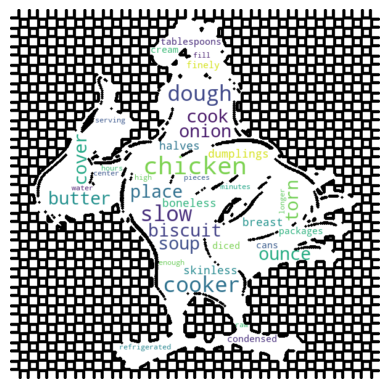

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load a mask image
mask_image = np.array(Image.open("C:/Users/16613/OneDrive/Desktop/Bana 275 NLP/recipes_raw/Cartoon-chicken-on-transparent-background-PNG.png"))

# Start with one review:
text = recipe_new.cleaned_text[0]

# Create and generate a word cloud image with the mask
wordcloud = WordCloud(background_color='white', contour_width= 5, max_font_size=50, mask=mask_image).generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
test_df = pd.read_csv("C:/Users/16613/OneDrive/Desktop/Bana 275 NLP/recipes_raw/test_cases.csv", header=None)
test_df.head()

test_df.set_index(pd.Series(range(0, len(test_df))), inplace=True)
test_df.rename(columns={0: 'suggestion'}, inplace=True)
#convert test df to a list
test_df.head(5)

,suggestion
0,"I want pork, green beans, rice"
1,"I want tofu, asparagus, noodles"
2,"I want chicken, mushrooms, quinoa"
3,"I want salmon, cabbage, rice noodles"
4,"I want beef, carrots, rice"


In [17]:
test_df['suggestion_clean'] = text_preprocessing(test_df['suggestion'])

In [18]:
test_results = []

for test_rec in test_df['suggestion_clean']:

    test_matrix = CV.transform([test_rec])
    #calculate cosine similarity
    cos_sim = cosine_similarity(test_matrix, converted_matrix).flatten()

    cos_df = pd.DataFrame(cos_sim, columns=['cosine_sim'])
    cos_df['title'] = recipe_new['title']

    cos_df.sort_values(by='cosine_sim', ascending=False, inplace=True)
    
    similar_recipes = []
    for i in range(0, 5):
        similar_recipes.append(cos_df.nlargest(5, 'cosine_sim')['title'].iloc[i])
    
    test_results.append([test_rec, similar_recipes])

print(test_results[0:5])

[['pork green beans rice', ['Green Beans', 'Grilled Green Beans', 'Grilled Fresh Green Beans', 'Honey Orange Green Beans', "Lucy's Recuperation Food"]], ['tofu asparagus noodles', ['Balsamic Vinegar Tofu and Asparagus Pasta Salad', 'Fast and Easy Tofu Lo-Mein', 'Vegan Lasagna I', 'Baked Tofu', 'Roasted Asparagus Salad with Feta Cheese']], ['chicken mushrooms quinoa', ['Chicken With Mushrooms', 'Balsamic Chicken Salad', 'Quinoa Chicken', 'Chicken Perkelt', 'Muenster Chicken and Mushrooms']], ['salmon cabbage rice noodles', ['Fried Cabbage and Egg Noodles', 'Smoked Salmon Sushi Roll', 'Salmon and Pesto with Rice', 'Transylvanian Cabbage and Noodles', 'Fried Cabbage and Noodles']], ['beef carrots rice', ['Confetti Rice with Carrot, Celery, and Almonds', "Raven's Beef Stew", 'Ground Beef and Rice with Cheese', 'Golompke (Beef and Cabbage Casserole)', 'Spicy American Spanish Rice']]]


In [19]:
df = pd.DataFrame(test_results, columns=['Description', 'Recommended Recipes'])

df.head(200)

,Description,Recommended Recipes
0,pork green beans rice,"[Green Beans, Grilled Green Beans, Grilled Fresh Green Beans, Honey Orange Green Beans, Lucy's Recuperation Food]"
1,tofu asparagus noodles,"[Balsamic Vinegar Tofu and Asparagus Pasta Salad, Fast and Easy Tofu Lo-Mein, Vegan Lasagna I, Baked Tofu, Roasted Asparagus Salad with Feta Cheese]"
2,chicken mushrooms quinoa,"[Chicken With Mushrooms, Balsamic Chicken Salad, Quinoa Chicken, Chicken Perkelt, Muenster Chicken and Mushrooms]"
3,salmon cabbage rice noodles,"[Fried Cabbage and Egg Noodles, Smoked Salmon Sushi Roll, Salmon and Pesto with Rice, Transylvanian Cabbage and Noodles, Fried Cabbage and Noodles]"
4,beef carrots rice,"[Confetti Rice with Carrot, Celery, and Almonds, Raven's Beef Stew, Ground Beef and Rice with Cheese, Golompke (Beef and Cabbage Casserole), Spicy American Spanish Rice]"
...,...,...
195,turkey cabbage brown rice,"[Aunt Wanda's Turkey Carcass Soup, Aunt Wanda's Turkey Carcass Soup, Mango-Lime Rice, Stuffed Cabbage/Golabki, Avocado Sushi with Brown Rice]"
196,chicken tomatoes quinoa,"[Tomato and Spinach Quinoa Skillet, Quinoa Chicken, Cold Chicken Quinoa Avocado Salad, Italian Quinoa Salad, Spicy Chicken Quinoa]"
197,salmon green beans rice,"[Green Beans, Grilled Green Beans, Grilled Fresh Green Beans, Honey Orange Green Beans, Lucy's Recuperation Food]"
198,beef asparagus noodles,"[One-Dish Beef Stroganoff and Noodles, Asparagus Beef Bundles, Carol's Chow Mein Noodle Casserole, Ground Beef Curly Noodle, Beef Tips and Noodles]"
